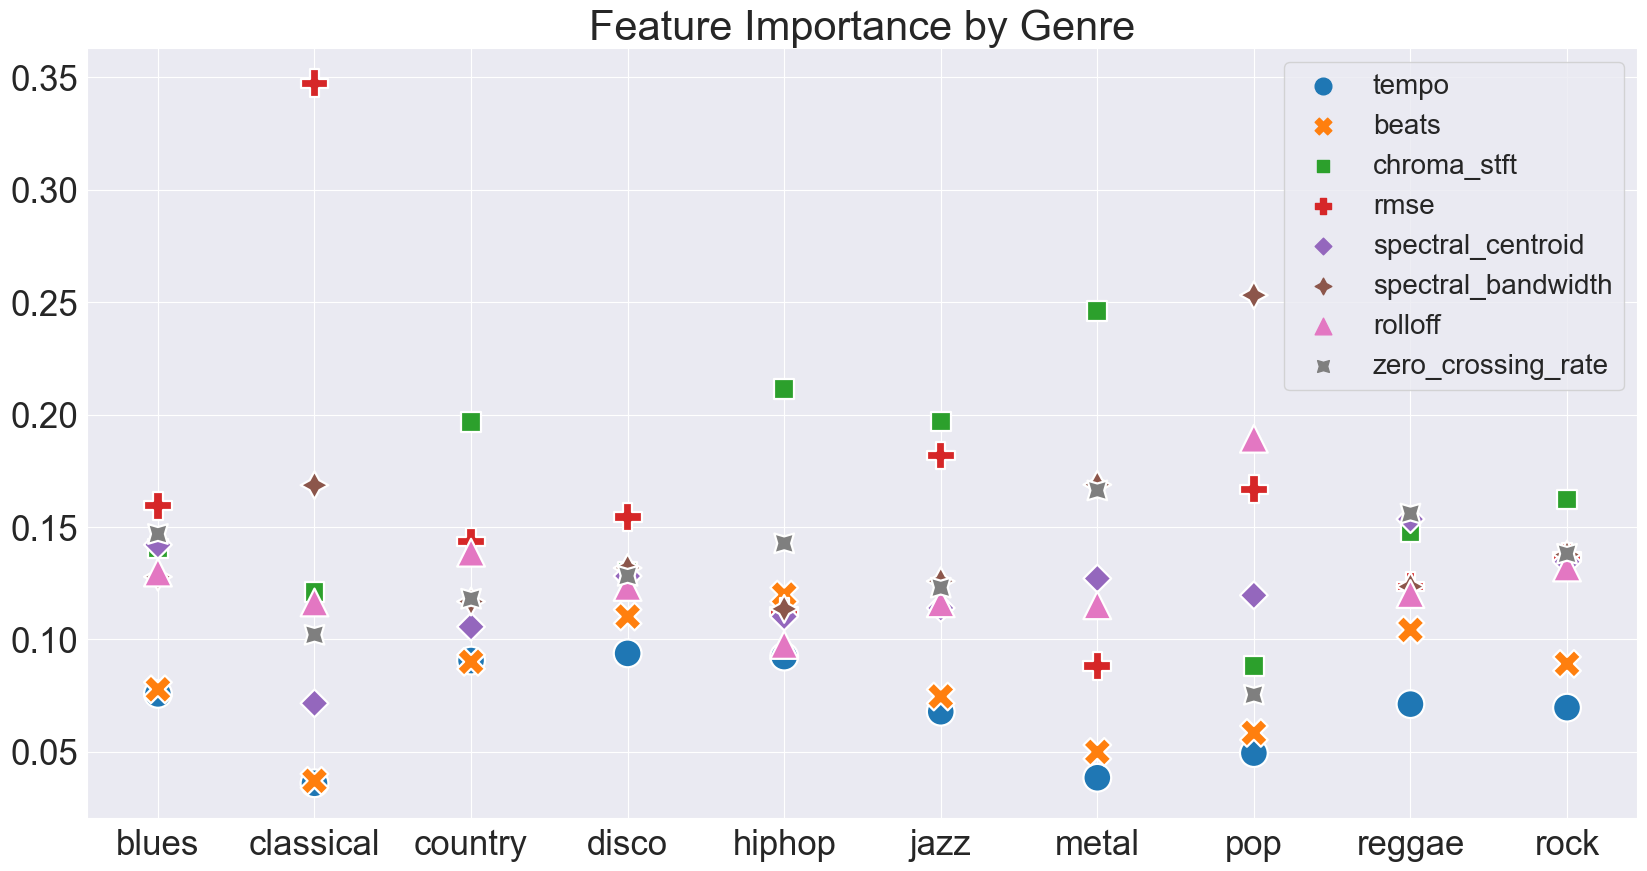

In [64]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from copy import copy

#pull in data from csv
df = pd.read_csv('music_feats.csv')

#drop unneeded columns
df = df[['tempo','beats','chroma_stft','rmse','spectral_centroid','spectral_bandwidth','rolloff','zero_crossing_rate','label']]

#get genres
genres = df['label'].unique()

#new dataframe to hold feature importances
df_new = pd.DataFrame(columns=['tempo','beats','chroma_stft','rmse','spectral_centroid','spectral_bandwidth','rolloff','zero_crossing_rate'])

#loop through genres
for genre in genres:

    #copy dataframe
    df_copy = df.copy()

    #label all genres as 'other' except for the current genre
    def update_label(label):
        if label == genre:
            return genre
        else:
            return 'other'

    #apply update_label function to df_copy
    df_copy['label'] = df_copy['label'].apply(update_label)

    #create x and y values
    y = df_copy['label'].values
    x = df_copy[['tempo','beats','chroma_stft','rmse','spectral_centroid','spectral_bandwidth','rolloff','zero_crossing_rate']].values

    #create random forest classifier
    n_estimators = 100
    rf_clf = RandomForestClassifier(n_estimators=n_estimators)

    # fit random forest to data
    rf_clf.fit(x, y)

    #get feature importances
    feat_import = rf_clf.feature_importances_

    #add feature importances to df_new
    df_new.loc[genre] = feat_import


#plot feature importances

# setting the style
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20, 10))
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)

# drawing the plot
sns.scatterplot(data=df_new, ax=ax, s=400)
plt.legend(markerscale=2, fontsize=20)
plt.title('Feature Importance by Genre', fontsize=30)

plt.show()